In [3]:
import category_encoders as ce
from sklearn.pipeline import make_pipeline 
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import r2_score
from pdpbox.pdp import pdp_isolate, pdp_plot
from pdpbox.pdp import pdp_interact,pdp_interact_plot
import eli5
from eli5.sklearn import PermutationImportance
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import shap
%config IPCompleter.greedy=True

In [4]:
# size for web display later
plt.rcParams['figure.dpi'] = 72

In [5]:
# df = pd.read_csv('vehicles.csv')
# df.head()

In [6]:
# df1 = df.drop(columns = ['description', 'url', 'region_url'] )

In [7]:
# df1.shape

In [8]:
# df1.isnull().sum()

In [9]:
# df1.to_csv('vehicles_trimmed.csv')

In [10]:
# ONLINE DOWNLOAD
# !wget https://drive.google.com/uc?id=1G4cm0Y7HyF8p6Kkg2u1Ze15VlcsUqPf6&export=download


In [11]:
df1 = pd.read_csv('vehicles_trimmed1.csv')
df1

,Unnamed: 0,id,region,price,year,manufacturer,model,condition,cylinders,fuel,...,vin,drive,size,type,paint_color,image_url,county,state,lat,long
0,0,7034441763,salt lake city,17899,2012.0,volkswagen,golf r,excellent,4 cylinders,gas,...,WVWPF7AJ6CW316713,4wd,compact,hatchback,black,https://images.craigslist.org/00G0G_fTLDWM5Xyv...,NaN,ut,40.7372,-111.858
1,1,7034440610,salt lake city,0,2016.0,ford,f-150,excellent,NaN,gas,...,1FTMF1EP3GKF13544,4wd,NaN,NaN,NaN,https://images.craigslist.org/00v0v_7Cu0buIofU...,NaN,ut,40.5881,-111.884
2,2,7034440588,salt lake city,46463,2015.0,gmc,sierra 1500,excellent,NaN,gas,...,3GTU2WEC6FG228025,4wd,NaN,NaN,white,https://images.craigslist.org/01515_lPvJ9bfbdY...,NaN,ut,40.5881,-111.884
3,3,7034440546,salt lake city,0,2016.0,ford,f-150,excellent,NaN,gas,...,1FTEX1EF6GKD25447,4wd,NaN,NaN,NaN,https://images.craigslist.org/00T0T_6Rjfp3NS4O...,NaN,ut,40.5881,-111.884
4,4,7034406932,salt lake city,49999,2018.0,ford,f-450,NaN,NaN,diesel,...,1FT8W4DT8GEA90427,4wd,NaN,pickup,white,https://images.craigslist.org/00W0W_8yIUwRBXXd...,NaN,ut,40.3744,-104.694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509572,509572,7034554007,salt lake city,15476,2012.0,nissan,xterra,NaN,6 cylinders,gas,...,5N1AN0NW0CC520698,4wd,NaN,SUV,NaN,https://images.craigslist.org/00z0z_3ERBmVoD5s...,NaN,ut,39.6405,-104.961
509573,509573,7034538385,salt lake city,9881,2008.0,bmw,3 series 328i,NaN,6 cylinders,gas,...,WBAWR33558P150498,rwd,NaN,convertible,NaN,https://images.craigslist.org/01313_38rMiNAW18...,NaN,ut,39.6405,-104.961
509574,509574,7034523643,salt lake city,24895,2019.0,jeep,cherokee,NaN,4 cylinders,gas,...,1C4PJMLB0KD267506,4wd,NaN,SUV,white,https://images.craigslist.org/00606_dOtGS5RmTi...,NaN,ut,45.1637,-113.894
509575,509575,7034458858,salt lake city,32500,2017.0,NaN,Porsche Macan GTS,excellent,6 cylinders,gas,...,NaN,NaN,NaN,NaN,red,https://images.craigslist.org/00s0s_32yAwr0KMt...,NaN,ut,41.3112,-111.969


Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [x] Choose your target. Which column in your tabular dataset will you predict?
- [x] Is your problem regression or classification?
- [x] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [x] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [x] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [x] Begin to clean and explore your data.
- [x] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

In [12]:
df1.columns

Index(['Unnamed: 0', 'id', 'region', 'price', 'year', 'manufacturer', 'model',
       'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'county', 'state', 'lat', 'long'],
      dtype='object')

In [13]:
# Choose target
target = 'price'

In [14]:
# Is your problem regression or classification?
# Regression, predicting a continuous variable with many levels

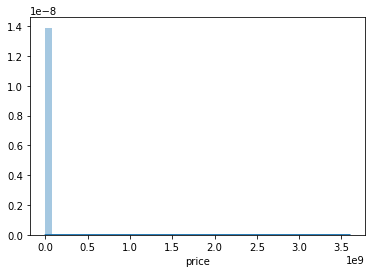

In [15]:
# Target distribution

sns.distplot(df1['price'])

In [16]:
pd.options.display.float_format = '{:.1f}'.format

In [17]:
print(np.median(df1['price']))
y = df1['price']
y.describe()
# Very right skewed but the 0s are holding it back even more. 
# Let's look at logs

9377.0


count       509577.0
mean         54796.8
std        9575025.1
min              0.0
25%           3995.0
50%           9377.0
75%          17955.0
max     3600028900.0
Name: price, dtype: float64

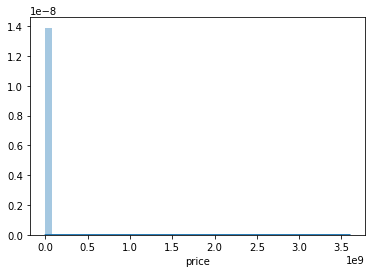

In [18]:
y = y.replace(0, np.NaN)
sns.distplot(y)

In [19]:
# It was deemed not worth log transforming, I did some modeling below and R^2 was worse
# y_log = np.log1p(y)
# sns.distplot(y_log)

In [20]:
# Chop out some outliers

# Also consider doing the test val train split before this and writing a function for it all
df2 = df1
df2['price'] = df2['price'].replace(0,np.NaN)
df2 = df2.dropna(subset=['price'])
df2 = df2[(df2['price'] >= np.percentile(df2['price'], 0.05)) &
          (df2['price'] <= np.percentile(df2['price'], 99.95))]
df2['price'].describe()

count   465765.0
mean     13606.2
std      11430.8
min          1.0
25%       5000.0
50%      10500.0
75%      18949.0
max     149000.0
Name: price, dtype: float64

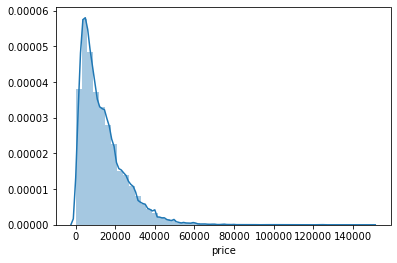

In [21]:
sns.distplot(df2['price'])

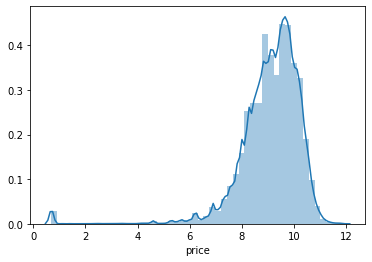

In [22]:
y = np.log1p(df2['price'])
sns.distplot(y)
# Now it's left skewed

In [23]:
y.describe()

count   465765.0
mean         9.1
std          1.2
min          0.7
25%          8.5
50%          9.3
75%          9.8
max         11.9
Name: price, dtype: float64

In [24]:
# Dollar amount of the average
np.e**9.1

8955.292703482504

In [25]:
# Choose your evaluation metric(s).

# R^2, MAE isn't as good with the log transformation

In [26]:
#Choose which observations you will use to train, validate, and test your model.
train_orig, test = train_test_split(df2.drop(columns=['county','Unnamed: 0']) , test_size = 0.1, train_size = 0.9)
test

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,transmission,vin,drive,size,type,paint_color,image_url,state,lat,long
372631,7038568817,hudson valley,600.0,2003.0,ford,e350 xlt,fair,8 cylinders,gas,255093.0,...,automatic,NaN,rwd,full-size,van,white,https://images.craigslist.org/00606_4HkYi0BaRL...,ny,41.5,-74.1
176166,7047566550,sarasota-bradenton,15995.0,1999.0,pontiac,firebird,NaN,NaN,other,74174.0,...,automatic,2G2FV22G2X2233490,NaN,NaN,coupe,NaN,https://images.craigslist.org/00I0I_3l03QhKMC0...,fl,27.3,-82.5
481050,7049496593,austin,22902.0,2017.0,chevrolet,colorado,NaN,6 cylinders,gas,49010.0,...,automatic,NaN,rwd,NaN,pickup,silver,https://images.craigslist.org/00P0P_9gPtZ0LDFd...,tx,30.2,-97.8
367205,7048925107,buffalo,5000.0,2008.0,bmw,535xi,good,6 cylinders,gas,164000.0,...,automatic,NaN,4wd,mid-size,sedan,silver,https://images.craigslist.org/00202_hlndAXIYu6...,ny,37.2,-95.8
413597,7048608169,tulsa,12500.0,2009.0,mercedes-benz,gl450,excellent,8 cylinders,gas,182010.0,...,automatic,NaN,4wd,full-size,SUV,black,https://images.craigslist.org/00R0R_cfBCaZXcgf...,ok,36.3,-95.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191294,7049578657,atlanta,2650.0,2006.0,chevrolet,malibu,excellent,6 cylinders,gas,nan,...,automatic,NaN,fwd,mid-size,hatchback,silver,https://images.craigslist.org/00R0R_auG3VxtDF2...,ga,33.7,-84.2
28343,7035957317,skagit / island / SJI,13388.0,2013.0,kia,optima sxl,good,4 cylinders,gas,72249.0,...,automatic,5XXGR4A64DG171479,fwd,NaN,sedan,NaN,https://images.craigslist.org/00000_f2RV8GSikk...,wa,48.5,-122.6
198039,7049459484,hawaii,6000.0,2015.0,nissan,versa sv,excellent,NaN,gas,73000.0,...,automatic,NaN,NaN,NaN,sedan,blue,https://images.craigslist.org/00z0z_2hi9hh2G3B...,hi,21.3,-158.1
404797,7047319021,lima / findlay,4950.0,2007.0,chevrolet,equinox lt,good,6 cylinders,gas,106565.0,...,automatic,NaN,fwd,mid-size,SUV,black,https://images.craigslist.org/00r0r_8DqoMeAoUq...,oh,40.7,-84.1


In [27]:
train, val = train_test_split(train_orig, train_size = 0.9, test_size = 0.1)
train

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,transmission,vin,drive,size,type,paint_color,image_url,state,lat,long
416236,7049427425,bend,9995.0,2008.0,acura,rdx,excellent,NaN,gas,120595.0,...,automatic,5J8TB18588A003121,4wd,NaN,SUV,NaN,https://images.craigslist.org/00g0g_bI7SzyqtnW...,or,45.6,-122.7
114766,7049188436,san diego,8997.0,2014.0,chevrolet,spark ev,like new,NaN,electric,nan,...,automatic,NaN,NaN,NaN,NaN,black,https://images.craigslist.org/00101_3wPpX2vlXd...,ca,33.8,-117.8
53426,7036821116,mobile,2700.0,2004.0,mercury,mountaineer,good,8 cylinders,gas,219000.0,...,automatic,4M2DU66W64ZJ01690,rwd,full-size,SUV,black,https://images.craigslist.org/00303_idL86D2nTe...,al,30.7,-88.1
385534,7032726069,utica-rome-oneida,28995.0,2011.0,ford,f-250 sd,excellent,8 cylinders,diesel,104149.0,...,automatic,1FT7W2BT5BEA60992,4wd,full-size,truck,custom,https://images.craigslist.org/00S0S_3uAtjcBzt3...,ny,43.1,-75.4
225860,7043913952,indianapolis,9800.0,2014.0,chevrolet,equinox,excellent,4 cylinders,gas,110650.0,...,automatic,2GNALBEK4E6108161,fwd,mid-size,SUV,black,https://images.craigslist.org/00U0U_aOeCNVhAgt...,in,39.7,-86.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71152,7048630561,fayetteville,10944.0,2015.0,nissan,altima,excellent,4 cylinders,gas,64950.0,...,automatic,1N4AL3AP4FC472689,fwd,full-size,sedan,white,https://images.craigslist.org/00r0r_6UPwlXCNVm...,ar,37.1,-93.3
386048,7037703070,watertown,5988.0,2012.0,chevrolet,cruze lt2,excellent,4 cylinders,gas,nan,...,manual,NaN,fwd,mid-size,sedan,silver,https://images.craigslist.org/00q0q_jDFCPrnJoS...,ny,44.0,-75.9
477081,7049269374,tri-cities,16990.0,2011.0,cadillac,escalade,NaN,NaN,other,142640.0,...,automatic,1GYS3DEF1BR117714,fwd,NaN,SUV,black,https://images.craigslist.org/00r0r_4ZvHnSIEen...,tn,35.9,-84.1
296299,7041240605,the thumb,26995.0,2018.0,jeep,grand cherokee,NaN,NaN,gas,nan,...,automatic,1C4RJFAG5JC321003,NaN,NaN,NaN,NaN,https://images.craigslist.org/01111_fZSRqqEVFc...,mi,43.2,-84.1


In [28]:
#  Begin to clean and explore your data.
# - [x] Begin to choose which features, if any, to exclude. Would some features "leak" future information?
# Question about what to do with price distribution: should I keep closing in the quartiles until the lower hump is left out?
# NaNs? Get rid of them?

In [29]:
# Wrangle ML datasets¶
# x Continue to clean and explore your data.
#  For the evaluation metric you chose, what score would you get just by guessing?
#  Can you make a fast, first model that beats guessing?

In [30]:
len(train['price'])

377269

In [31]:
# MEAN BASELINE
#  For the evaluation metric you chose, what score would you get just by guessing?
# R^2 for a flat line of the mean would be 0. Let's look at the MAE
list_of_mean = [train['price'].mean()] * len(val['price'])
mean_absolute_error(val['price'], list_of_mean)

8630.88809524037

In [32]:
# LINEAR REGRESSION (to beat) BASELINE
# Let's do a univariate linear regression as a baseline as well
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(train[['year']])
lr = LinearRegression()
model = lr.fit(imp_mean.transform(train[['year']]),train['price'])

print('MAE:', mean_absolute_error(val['price'], model.predict(imp_mean.transform(val[['year']]))))
print('R^2:', r2_score(val['price'], model.predict(imp_mean.transform(val[['year']]))))
# Alrighty then. Got some baselines!

MAE: 7832.270108718798
R^2: 0.10691898387274412


In [33]:
target = 'price'
features = ['region', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'vin',
       'drive', 'size', 'type', 'paint_color', 'state', 'lat',
       'long']
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

In [34]:
# Heck let's do a decision tree as a baseline too
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    DecisionTreeRegressor(max_depth=10)
)
pipeline.fit(X_train, y_train)


Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['region', 'manufacturer', 'model',
                                      'condition', 'cylinders', 'fuel',
                                      'title_status', 'transmission', 'vin',
                                      'drive', 'size', 'type', 'paint_color',
                                      'state'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'region',
                                          'data_type': dtype('O'),
                                          'mapping': bend                   1
san diego              2...
                               missing_values=nan, strategy='median',
                               verbose=0)),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
  

In [35]:
y_pred = pipeline.predict(X_val)
print('MAE:', mean_absolute_error(y_val, y_pred))
print('R^2:', r2_score(y_val, y_pred))

# Pretty dope tree

MAE: 4056.118251056099
R^2: 0.6575242997125337


In [36]:
# Permutation & Boosting¶
# You will use your portfolio project dataset for all assignments this sprint.

# Assignment
# Complete these tasks for your project, and document your work.

# x If you haven't completed assignment #1, please do so first.
# x Continue to clean and explore your data. Make exploratory visualizations.
# x Fit a model. Does it beat your baseline?
# x Try xgboost.
# x Get your model's permutation importances.

In [37]:
train.dtypes

id                int64
region           object
price           float64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
vin              object
drive            object
size             object
type             object
paint_color      object
image_url        object
state            object
lat             float64
long            float64
dtype: object

Text(0.5, 1.0, 'price by year')

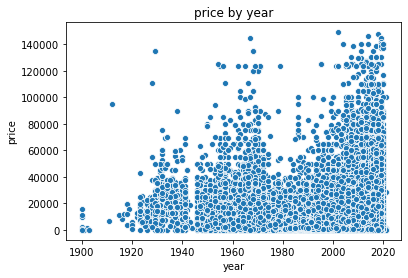

In [38]:
sns.scatterplot(train['year'], train['price'])
plt.title('price by year')

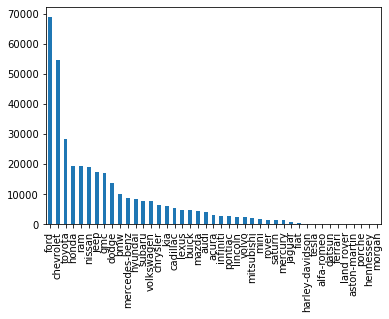

In [39]:
train['manufacturer'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'price by color')

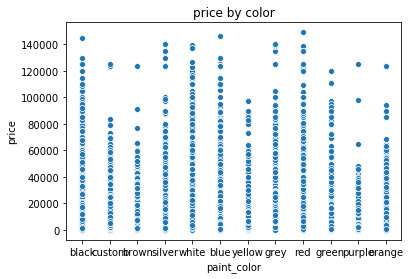

In [40]:
sns.scatterplot(train['paint_color'], train['price'])
plt.title('price by color')

In [41]:
# BEAT BASELINE WITH TREES
%%time
# Random Forest model

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    RandomForestRegressor(n_estimators=50)
)
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_val)
print('MAE:', mean_absolute_error(y_val, y_pred))
print('R^2:', r2_score(y_val, y_pred))

# lit, already happy about that

MAE: 2241.1710617071576
R^2: 0.831444528611293
Wall time: 3min 1s


In [76]:
# XGBoost

# pipeline = make_pipeline(
#     ce.OrdinalEncoder(), 
#     # SimpleImputer(strategy='median'),  missing values accepted in this
#     XGBRegressor(n_estimators=70, random_state=42, n_jobs=-1)
# )
# pipeline.fit(X_train, y_train)

# y_pred = pipeline.predict(X_val)
# print('MAE:', mean_absolute_error(y_val, y_pred))
# print('R^2:', r2_score(y_val, y_pred))

# Much to tune indeed

[16:34:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE: 4085.5742847223587
R^2: 0.6513931236503634


In [80]:
# Early stopping, 
# encoder = ce.OrdinalEncoder()
# X_train_encoded = encoder.fit_transform(X_train)
# X_val_encoded = encoder.transform(X_val)
# model = XGBRegressor(
#     n_estimators= 500, # up to 1000, depends on early stop
#     max_depth = 7,
#     learning_rate= 0.5, # try higher learning rate
# )

# eval_set = [(X_train_encoded, y_train), (X_val_encoded, y_val)]

# model.fit(X_train_encoded,y_train,
#           eval_set = eval_set,
#           eval_metric = 'mae',
#           early_stopping_rounds = 50)
# Random forest still better, will have to play with it

[16:53:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-mae:7381.13	validation_1-mae:7319.4
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 50 rounds.
[1]	validation_0-mae:4988.48	validation_1-mae:4971.03
[2]	validation_0-mae:4195.16	validation_1-mae:4197.81
[3]	validation_0-mae:3923.63	validation_1-mae:3937.89
[4]	validation_0-mae:3811.74	validation_1-mae:3832.81
[5]	validation_0-mae:3730.88	validation_1-mae:3749.57
[6]	validation_0-mae:3683.74	validation_1-mae:3707.76
[7]	validation_0-mae:3625.57	validation_1-mae:3656.22
[8]	validation_0-mae:3567.49	validation_1-mae:3601.87
[9]	validation_0-mae:3530.55	validation_1-mae:3566.74
[10]	validation_0-mae:3464.69	validation_1-mae:3525.22
[11]	validation_0-mae:3442.18	validation_1-mae:3508.15
[12]	validation_0-mae:3416.68	validation_1-mae:3490.54
[13]	validation_0-mae:3

[144]	validation_0-mae:2432.46	validation_1-mae:2803.13
[145]	validation_0-mae:2427.67	validation_1-mae:2799.83
[146]	validation_0-mae:2425.76	validation_1-mae:2798.94
[147]	validation_0-mae:2424.25	validation_1-mae:2798.54
[148]	validation_0-mae:2421.37	validation_1-mae:2796.74
[149]	validation_0-mae:2420.47	validation_1-mae:2796.15
[150]	validation_0-mae:2417.03	validation_1-mae:2793.99
[151]	validation_0-mae:2415.83	validation_1-mae:2794.21
[152]	validation_0-mae:2412.13	validation_1-mae:2789.86
[153]	validation_0-mae:2407.75	validation_1-mae:2787.93
[154]	validation_0-mae:2402.06	validation_1-mae:2784.47
[155]	validation_0-mae:2399.73	validation_1-mae:2783.99
[156]	validation_0-mae:2397.33	validation_1-mae:2782.76
[157]	validation_0-mae:2394.92	validation_1-mae:2781.96
[158]	validation_0-mae:2394.13	validation_1-mae:2782.02
[159]	validation_0-mae:2390.67	validation_1-mae:2779.64
[160]	validation_0-mae:2388.25	validation_1-mae:2779.04
[161]	validation_0-mae:2385.32	validation_1-mae:

[291]	validation_0-mae:2092.08	validation_1-mae:2655
[292]	validation_0-mae:2090.34	validation_1-mae:2654.05
[293]	validation_0-mae:2086.97	validation_1-mae:2651.14
[294]	validation_0-mae:2086.1	validation_1-mae:2651.16
[295]	validation_0-mae:2085.4	validation_1-mae:2651.09
[296]	validation_0-mae:2083.53	validation_1-mae:2651
[297]	validation_0-mae:2082.74	validation_1-mae:2650.94
[298]	validation_0-mae:2080.52	validation_1-mae:2649.9
[299]	validation_0-mae:2078.92	validation_1-mae:2648.76
[300]	validation_0-mae:2076.27	validation_1-mae:2647.4
[301]	validation_0-mae:2074.2	validation_1-mae:2646.36
[302]	validation_0-mae:2072.63	validation_1-mae:2645.69
[303]	validation_0-mae:2071.39	validation_1-mae:2644.74
[304]	validation_0-mae:2069.6	validation_1-mae:2643.67
[305]	validation_0-mae:2068.66	validation_1-mae:2644.06
[306]	validation_0-mae:2067.43	validation_1-mae:2644.17
[307]	validation_0-mae:2063.38	validation_1-mae:2641.1
[308]	validation_0-mae:2060.92	validation_1-mae:2639.13
[309]

[438]	validation_0-mae:1848.94	validation_1-mae:2545.78
[439]	validation_0-mae:1847.81	validation_1-mae:2546.35
[440]	validation_0-mae:1846.45	validation_1-mae:2545.52
[441]	validation_0-mae:1845.5	validation_1-mae:2544.85
[442]	validation_0-mae:1845.09	validation_1-mae:2544.5
[443]	validation_0-mae:1843.82	validation_1-mae:2543.91
[444]	validation_0-mae:1842.41	validation_1-mae:2543.28
[445]	validation_0-mae:1841.53	validation_1-mae:2542.95
[446]	validation_0-mae:1840.28	validation_1-mae:2542.73
[447]	validation_0-mae:1839.24	validation_1-mae:2541.98
[448]	validation_0-mae:1837.83	validation_1-mae:2541.8
[449]	validation_0-mae:1835.98	validation_1-mae:2540.62
[450]	validation_0-mae:1835.39	validation_1-mae:2540.66
[451]	validation_0-mae:1833.26	validation_1-mae:2539.68
[452]	validation_0-mae:1832.18	validation_1-mae:2539.08
[453]	validation_0-mae:1830.54	validation_1-mae:2538.83
[454]	validation_0-mae:1829.63	validation_1-mae:2538.38
[455]	validation_0-mae:1828.72	validation_1-mae:253

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.5, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [52]:
# Early stopping, TUNED
%time
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
model = XGBRegressor(
    n_estimators= 350, # up to 300, depends on early stop
    max_depth = 35,
    learning_rate= 0.10, # Lower rate helps with overfitting.
    n_jobs=-3
)

eval_set = [(X_train_encoded, y_train), (X_val_encoded, y_val)]

model.fit(X_train_encoded,y_train,
          eval_set = eval_set, # This is what is being scored (why we have two col)
          eval_metric = 'mae',
          early_stopping_rounds = 2) #stop if score not improved in n rounds
    

Wall time: 0 ns
[21:48:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-mae:12291.4	validation_1-mae:12407.6
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 2 rounds.
[1]	validation_0-mae:11114.9	validation_1-mae:11266
[2]	validation_0-mae:10055.9	validation_1-mae:10243.3
[3]	validation_0-mae:9101.46	validation_1-mae:9330.82
[4]	validation_0-mae:8241.88	validation_1-mae:8516.42
[5]	validation_0-mae:7465.79	validation_1-mae:7790.15
[6]	validation_0-mae:6765.66	validation_1-mae:7140.83
[7]	validation_0-mae:6134.09	validation_1-mae:6560.6
[8]	validation_0-mae:5564.53	validation_1-mae:6048.83
[9]	validation_0-mae:5050.42	validation_1-mae:5589.32
[10]	validation_0-mae:4586.16	validation_1-mae:5184.69
[11]	validation_0-mae:4166.84	validation_1-mae:4825.5
[12]	validation_0-mae:3788.34	validation_1-mae:4509.8
[13]	validat

[144]	validation_0-mae:21.4109	validation_1-mae:2034.21
[145]	validation_0-mae:21.3822	validation_1-mae:2034.21
[146]	validation_0-mae:21.359	validation_1-mae:2034.2
[147]	validation_0-mae:21.3387	validation_1-mae:2034.19
[148]	validation_0-mae:21.3195	validation_1-mae:2034.19
[149]	validation_0-mae:21.2998	validation_1-mae:2034.19
[150]	validation_0-mae:21.2808	validation_1-mae:2034.18
[151]	validation_0-mae:21.2623	validation_1-mae:2034.18
[152]	validation_0-mae:21.2416	validation_1-mae:2034.17
[153]	validation_0-mae:21.2233	validation_1-mae:2034.17
[154]	validation_0-mae:21.2063	validation_1-mae:2034.16
[155]	validation_0-mae:21.1889	validation_1-mae:2034.16
[156]	validation_0-mae:21.1738	validation_1-mae:2034.16
[157]	validation_0-mae:21.1573	validation_1-mae:2034.15
[158]	validation_0-mae:21.1417	validation_1-mae:2034.15
[159]	validation_0-mae:21.1263	validation_1-mae:2034.14
[160]	validation_0-mae:21.1121	validation_1-mae:2034.14
[161]	validation_0-mae:21.0994	validation_1-mae:20

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=35, min_child_weight=1, missing=None, n_estimators=350,
             n_jobs=-3, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

Text(0.5, 1.0, 'XGBoost MAE by Round')

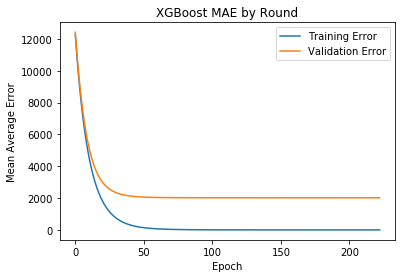

In [66]:
# Let's plot XGBoost's journey

results = model.evals_result_
training_err = results['validation_0']['mae']
validation_err = results['validation_1']['mae']
epoch = list(range(0,len(training_err)))

plt.plot(epoch,training_err, label = 'Training Error')
plt.plot(epoch,validation_err, label = 'Validation Error')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Mean Average Error')
plt.title('XGBoost MAE by Round')

In [53]:
# XGBoost R^2
y_pred = model.predict(X_val_encoded)
print('R^2:', r2_score(y_val, y_pred))

# BEAT BASELINE, slightly better than RF R^2= 0.83144

R^2: 0.8374561214569745


In [58]:
# Clean up for permutation importances/ pdp
encoder = ce.OrdinalEncoder()
val_encoded = encoder.fit_transform(val)
imputer = SimpleImputer(strategy='median')
val_imputed = imputer.fit_transform(val_encoded)
df_val_imputed = pd.DataFrame(data= val_imputed, columns=val.columns)
X_val_imputed = df_val_imputed[features]
rf = RandomForestRegressor()
model = rf.fit(X_val_imputed, y_val)

In [82]:
# Permutation importances
permuter = PermutationImportance(
    model,
    scoring= 'r2',
    n_iter = 5,
    random_state=42

)

permuter.fit(X_val_imputed, y_val)

PermutationImportance(cv='prefit',
                      estimator=RandomForestRegressor(bootstrap=True,
                                                      ccp_alpha=0.0,
                                                      criterion='mse',
                                                      max_depth=None,
                                                      max_features='auto',
                                                      max_leaf_nodes=None,
                                                      max_samples=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      n_estimators=100

In [84]:
feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=False)

# Here I can consider cutting down columns, would it make a better app?\
# predictively I'm ok, not phenomenal, so should I prioritize ^

year           0.7
odometer       0.4
drive          0.3
fuel           0.3
cylinders      0.1
manufacturer   0.1
long           0.1
lat            0.1
model          0.1
type           0.1
condition      0.0
vin            0.0
region         0.0
state          0.0
paint_color    0.0
transmission   0.0
size           0.0
title_status   0.0
dtype: float64

In [85]:
eli5.show_weights(
    permuter,
    top=11, # number of features to show, no limit
    feature_names= feature_names, # must be a list
)

Weight,Feature
0.7034 ± 0.0114,year
0.3505 ± 0.0082,odometer
0.2853 ± 0.0077,drive
0.2736 ± 0.0048,fuel
0.1244 ± 0.0018,cylinders
0.0873 ± 0.0033,manufacturer
0.0704 ± 0.0010,long
0.0647 ± 0.0028,lat
0.0587 ± 0.0012,model
0.0587 ± 0.0026,type


In [ ]:
# Model Interpretation
# You will use your portfolio project dataset for all assignments this sprint.

# Assignment
# Complete these tasks for your project, and document your work.

# x Continue to iterate on your project: data cleaning, exploratory visualization, feature engineering, modeling.
# x Make at least 1 partial dependence plot to explain your model.
# x Make at least 1 Shapley force plot to explain an individual prediction.
# x Share at least 1 visualization (of any type) on Slack!
# Stretch Goals
# Partial Dependence Plots
#  Make multiple PDPs with 1 feature in isolation.
# x Make multiple PDPs with 2 features in interaction.
#  Use Plotly to make a 3D PDP.

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x2264015b488>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x226013b9b48>})

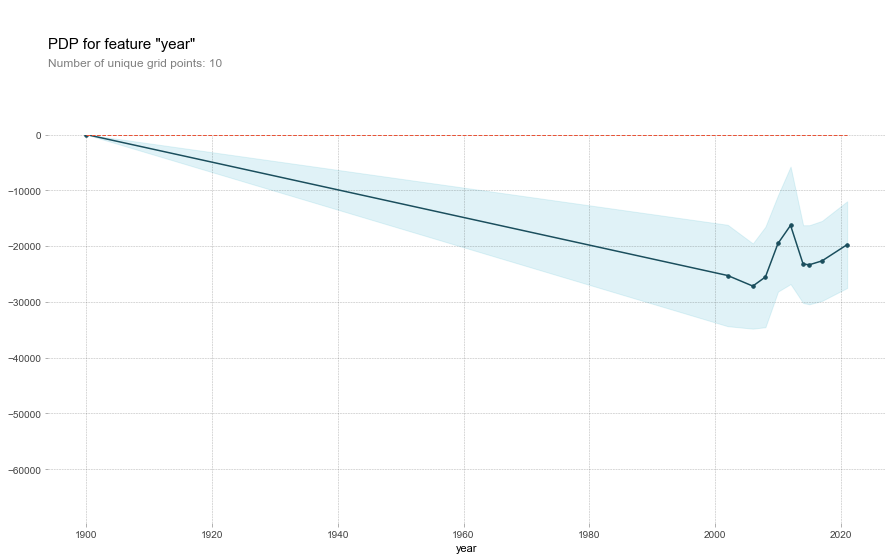

In [60]:
# x Make at least 1 partial dependence plot to explain your model.

feature = 'year'
isolated = pdp_isolate(
    model = pipeline,
    dataset= X_val_imputed,
    model_features= X_val_imputed.columns,
    feature = feature
)
pdp_plot(isolated, feature_name= feature)

# neat. You can kinda see what cars people put up for sale have value.

In [71]:
# let's look at that old year
val.sort_values(by='year').head(6)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,transmission,vin,drive,size,type,paint_color,image_url,state,lat,long
375986,7043607692,long island,1.0,1900.0,NaN,ANY,good,other,other,158100.0,...,other,1HTSCABK71H400048,rwd,full-size,truck,custom,https://images.craigslist.org/00W0W_gOZsXfeDMf...,ny,40.8,-73.3
493254,7042482733,galveston,100.0,1900.0,NaN,s,NaN,NaN,other,nan,...,other,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00W0W_6LHbhF60va...,tx,29.4,-95.0
135695,7049705658,denver,15800.0,1900.0,jeep,wrangler unlimited sahara,excellent,6 cylinders,gas,126000.0,...,automatic,NaN,4wd,NaN,NaN,orange,https://images.craigslist.org/00B0B_lGWjhvAa99...,co,39.7,-105.1
439625,7049756216,lehigh valley,3.0,1903.0,NaN,All mAkes,NaN,NaN,gas,nan,...,other,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00d0d_kgloDtIqUF...,pa,40.8,-75.6
270222,7048696066,south coast,7000.0,1911.0,ford,model t,salvage,4 cylinders,gas,nan,...,manual,NaN,rwd,NaN,NaN,red,https://images.craigslist.org/00s0s_1ypW227JM2...,ma,41.9,-71.1
424782,7049387969,medford-ashland,9495.0,1922.0,ford,model t runabout,NaN,NaN,gas,nan,...,other,CA393011,NaN,NaN,NaN,NaN,https://images.craigslist.org/00W0W_llErlIVbi4...,or,42.4,-123.3


(<Figure size 540x684 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x25f21fe6788>,
  'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x25f21d9c2c8>})

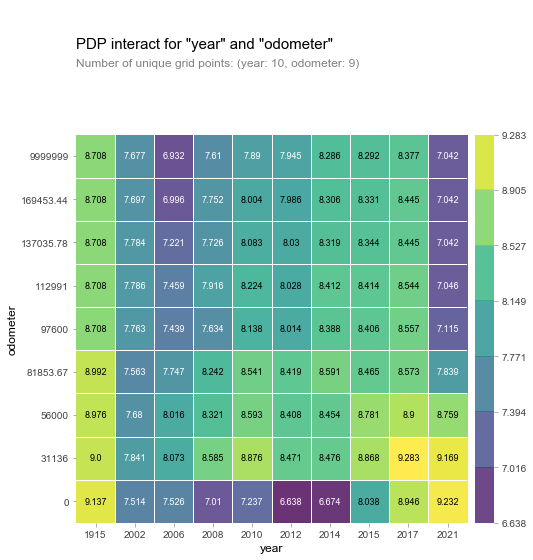

In [77]:
# STRETCH
#  Make multiple PDPs with 2 features in interaction.
feature= ['year', 'odometer']

interaction = pdp_interact(
    model = pipeline,
    dataset = X_val_imputed,
    model_features= X_val_imputed.columns,
    features= feature
)
pdp_interact_plot(interaction, plot_type='grid', feature_names=feature)
# Kinda meaningless without the drive dictionary

In [64]:
# encoder.get_feature_names 
# Didn't quite get this to work to show drive

In [62]:
#  Make at least 1 Shapley force plot to explain an individual prediction.
row = X_val_imputed.iloc[[5]]
y_val.iloc[[5]], model.predict(row)

(412645   2200.0
 Name: price, dtype: float64,
 array([2549.72]))

In [63]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value= explainer.expected_value,
    shap_values = shap_values,
    features= row

)
